In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
# Load dataset
df = pd.read_csv('Alphabets_data.csv')

# Overview
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbo

In [12]:
# Encode target labels (assuming 'label' is the column with alphabets)

print(df.columns)  # Check actual column names first

label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])

# Split features and labels
X = df.drop('letter', axis=1)
y = df['letter']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [13]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')  # output neurons = number of classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4079 - loss: 2.2233 - val_accuracy: 0.7519 - val_loss: 0.9001
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7783 - loss: 0.7760 - val_accuracy: 0.8222 - val_loss: 0.6177
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8414 - loss: 0.5641 - val_accuracy: 0.8522 - val_loss: 0.5047
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.4436 - val_accuracy: 0.8809 - val_loss: 0.4135
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8881 - loss: 0.3787 - val_accuracy: 0.8934 - val_loss: 0.3615
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9066 - loss: 0.3113 - val_accuracy: 0.8991 - val_loss: 0.3351
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.2844 - val_accuracy: 0.9091 - val_loss: 0.3000
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9274 - loss: 0.2455 - val_accuracy: 0.9181 - val_

In [14]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Predictions and Report
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.1718
Test Accuracy: 0.95
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           A       0.94      0.99      0.96       149
           B       0.89      0.95      0.92       153
           C       0.98      0.90      0.94       137
           D       0.94      0.95      0.94       156
           E       0.92      0.95      0.93       141
           F       0.90      0.92      0.91       140
           G       0.96      0.94      0.95       160
           H       0.94      0.81      0.87       144
           I       0.98      0.95      0.96       146
           J       0.97      0.97      0.97       149
           K       0.83      0.92      0.87       130
           L       0.99      0.96      0.97       155
           M       0.94      0.98      0.96       168
           N       0.99      0.88      0.93       151
           O       0.93      0.99      0.96       145

In [21]:
# Define a function to build and train a model with different hyperparameters
def build_and_train_model(hidden_units=64, activation='relu', learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(hidden_units, activation=activation),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    val_acc = history.history['val_accuracy'][-1]

    print(f"Hidden Units: {hidden_units}, Activation: {activation}, LR: {learning_rate}, Val Accuracy: {val_acc:.4f}")
    return model

# Build and train a model with default hyperparameters
model2 = build_and_train_model()

# Evaluate best model (say model2 performed best)
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f"Test Accuracy of Best Model: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hidden Units: 64, Activation: relu, LR: 0.001, Val Accuracy: 0.9006
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9124 - loss: 0.2961
Test Accuracy of Best Model: 0.9060


In [16]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.0 MB/s eta 0:00:00


In [18]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate
best_loss, best_acc = best_model.evaluate(X_test, y_test)
print(f"Tuned Model Accuracy: {best_acc:.2f}")

# Classification report
y_pred_best = np.argmax(best_model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9192 - loss: 0.2777
Tuned Model Accuracy: 0.92
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           A       0.98      0.96      0.97       149
           B       0.89      0.85      0.87       153
           C       0.90      0.93      0.91       137
           D       0.90      0.92      0.91       156
           E       0.87      0.91      0.89       141
           F       0.95      0.85      0.90       140
           G       0.85      0.97      0.90       160
           H       0.91      0.68      0.78       144
           I       0.95      0.93      0.94       146
           J       0.93      0.94      0.93       149
           K       0.82      0.85      0.84       130
           L       0.90      0.96      0.93       155
           M       0.98      0.97      0.97       168
           N       0.86      0.97      0.92       151
           O       0.92      0.90      0.91   

In [24]:
print(df.columns)
print(df['letter'].unique())

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')
[19  8  3 13  6 18  1  0  9 12 23 14 17  5  2  7 22 11 15  4 21 24 16 20
 10 25]


In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,368 (142.07 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,246 (94.71 KB)

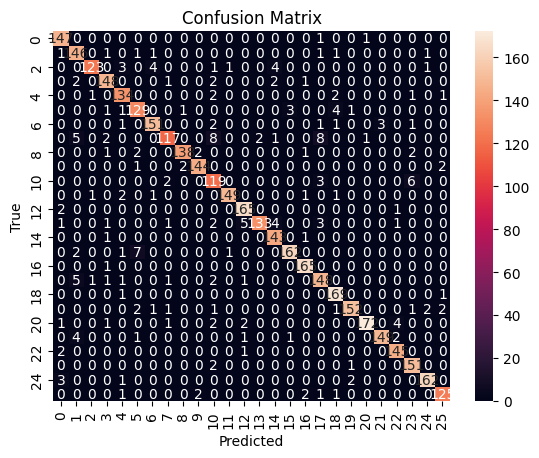

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [30]:
def train_with_params(units1, units2, lr):
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(units1, activation='relu'),
        layers.Dense(units2, activation='relu'),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"units1={units1}, units2={units2}, lr={lr} --> val_accuracy={val_acc:.4f}")
    return model, val_acc

# Try a few combinations manually
results = []
for u1 in [64, 128]:
    for u2 in [32, 64]:
        for lr in [0.001, 0.0005]:
            model, val_acc = train_with_params(u1, u2, lr)
            results.append((model, val_acc, u1, u2, lr))

# Pick the best model
best_model = max(results, key=lambda x: x[1])[0]


units1=64, units2=32, lr=0.001 --> val_accuracy=0.8872
units1=64, units2=32, lr=0.0005 --> val_accuracy=0.8428
units1=64, units2=64, lr=0.001 --> val_accuracy=0.9097
units1=64, units2=64, lr=0.0005 --> val_accuracy=0.8703
units1=128, units2=32, lr=0.001 --> val_accuracy=0.9072
units1=128, units2=32, lr=0.0005 --> val_accuracy=0.8700
units1=128, units2=64, lr=0.001 --> val_accuracy=0.9278
units1=128, units2=64, lr=0.0005 --> val_accuracy=0.8966
